In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
#%matplotlib notebook

In [2]:
# load the image, clone it for output, and then convert it to grayscale
image = cv2.imread("..\input\circles1.png")
output = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

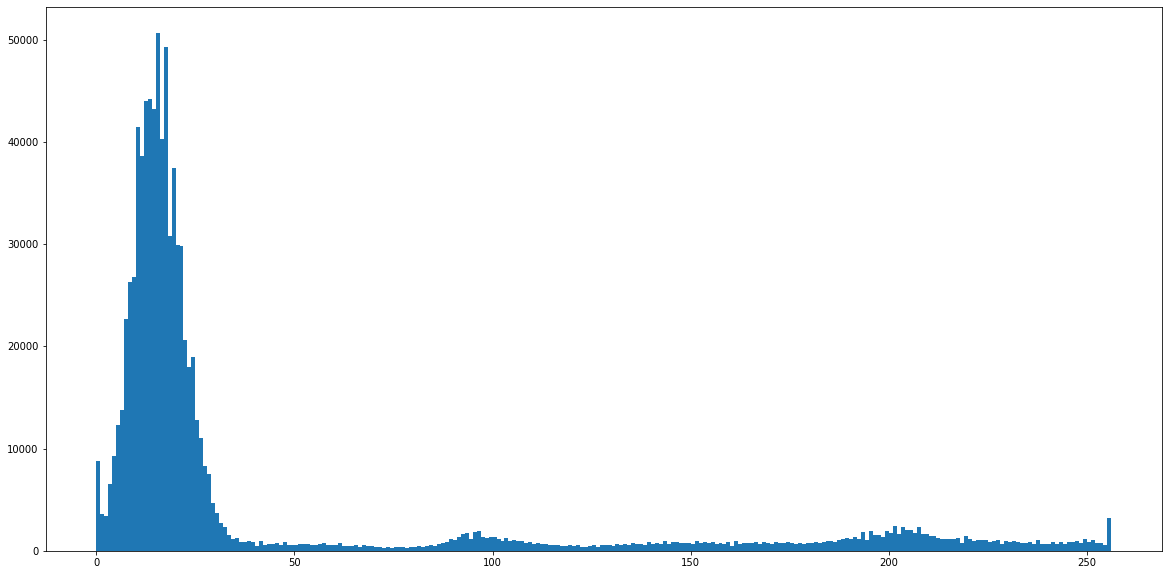

In [3]:
plt.hist(image.ravel(),256,[0,256]); plt.show()

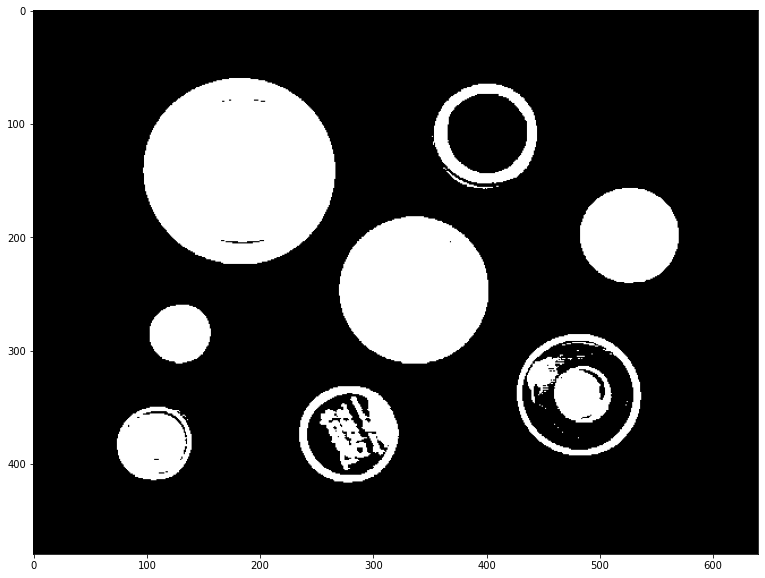

In [23]:
ret,thresh1 = cv2.threshold(image,70,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")
plt.show()

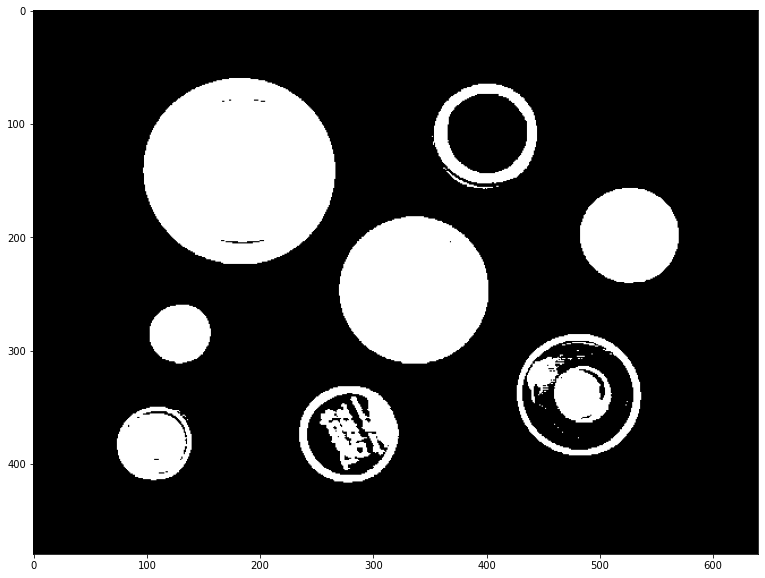

In [24]:
test = thresh1[:,:,1]
test.shape
plt.imshow(test, cmap="gray")
plt.show()

In [36]:
blur2 = cv2.GaussianBlur(test,(6,6),0)
plt.imshow(blur2, cmap="gray")
plt.show()

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\smooth.cpp:3818: error: (-215:Assertion failed) ksize.width > 0 && ksize.width % 2 == 1 && ksize.height > 0 && ksize.height % 2 == 1 in function 'cv::createGaussianKernels'


In [27]:
blur = cv2.GaussianBlur(image,(5,5),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)

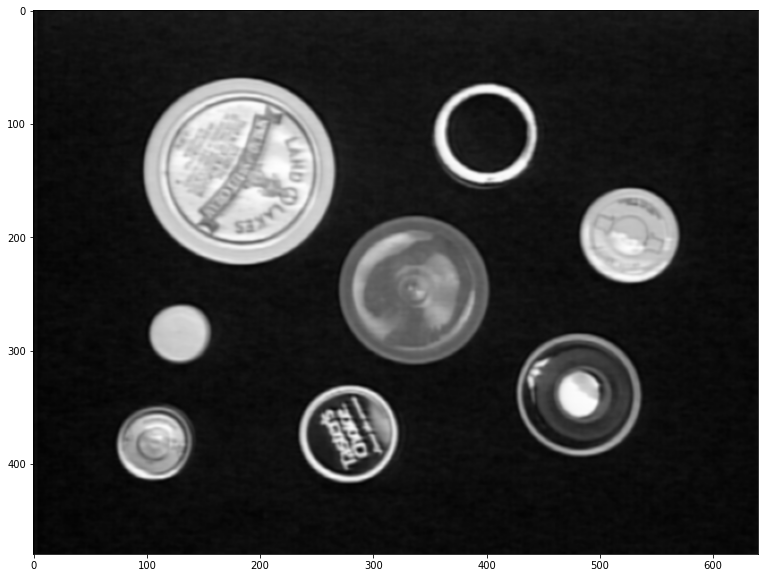

In [29]:
plt.imshow(blur)
plt.show()

In [8]:
th2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

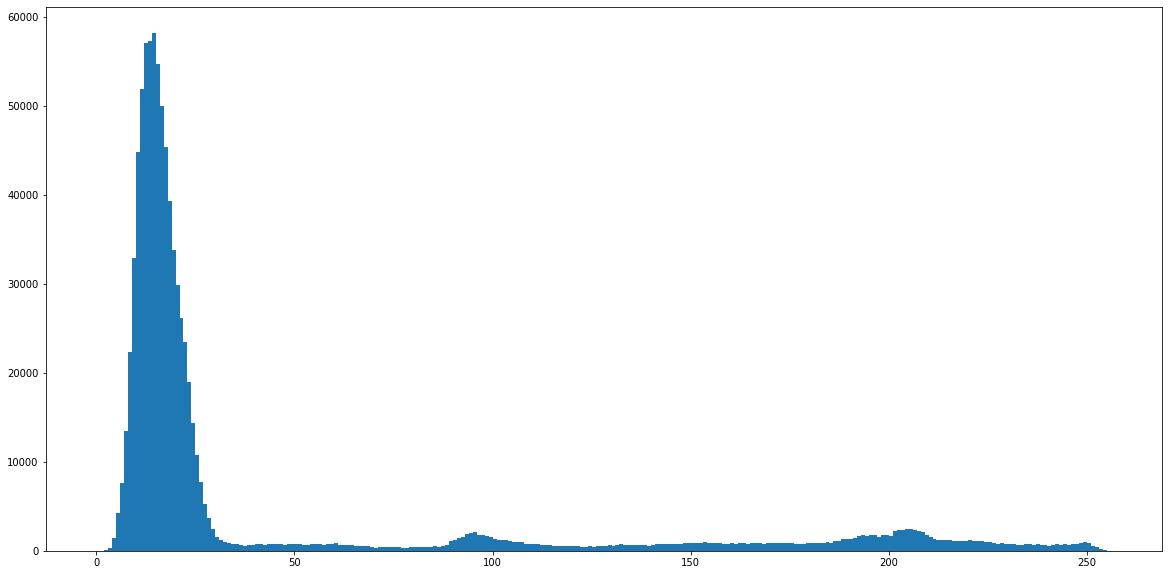

In [9]:
plt.hist(blur.ravel(),256,[0,256]); plt.show()

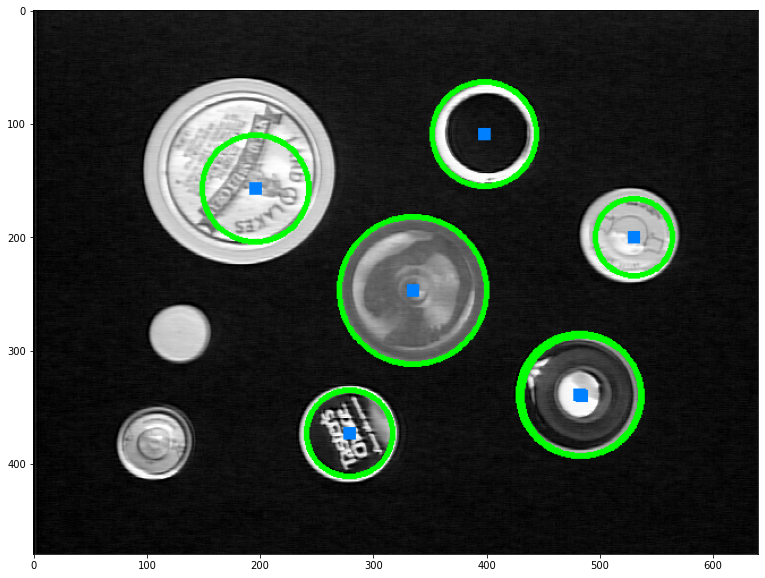

In [19]:
# detect circles in the image
circles = cv2.HoughCircles(blur2, cv2.HOUGH_GRADIENT, 1.2, 100)
# ensure at least some circles were found
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    # show the output image
plt.imshow(output, cmap='gray')
plt.show()